In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import geodesic_integrator
GI = geodesic_integrator.GeodesicIntegrator(mass = 1)

In [5]:
GI.calc_trajectory( k_x_0 = 0., x0 = 0.0, k_y_0 = 1., y0 = 0.0, k_z_0 = 0., z0 = 2.2,\
                        R_end = -1,\
                        curve_start = 0, \
                        curve_end = 50, \
                        nr_points_curve = 50, \
                        max_step = np.inf,\
                        verbose = False \
                       )

           message: The solver successfully reached the end of the integration interval.
           success: True
            status: 0
                 t: [ 0.000e+00  1.020e+00 ...  4.898e+01  5.000e+01]
                 y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                     [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                     ...
                     [ 0.000e+00 -3.790e-01 ... -8.645e-01 -8.644e-01]
                     [ 2.200e+00  2.003e+00 ... -3.983e+01 -4.071e+01]]
               sol: None
          t_events: [array([], dtype=float64)]
          y_events: [array([], dtype=float64)]
              nfev: 62
              njev: 0
               nlu: 0
     hit_blackhole: False
 start_inside_hole: False

In [20]:
x0 = 0.0
y0= 2.2
th_l = np.array(range(0, int(2*np.pi*10), 1))/10 #- 1/2*np.pi
kx_l = [np.cos(i) for i in th_l]
ky_l = [np.sin(i) for i in th_l]
#kx_l, ky_l, int(np.pi*10)
th_l

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1])

(-30.0, 30.0)

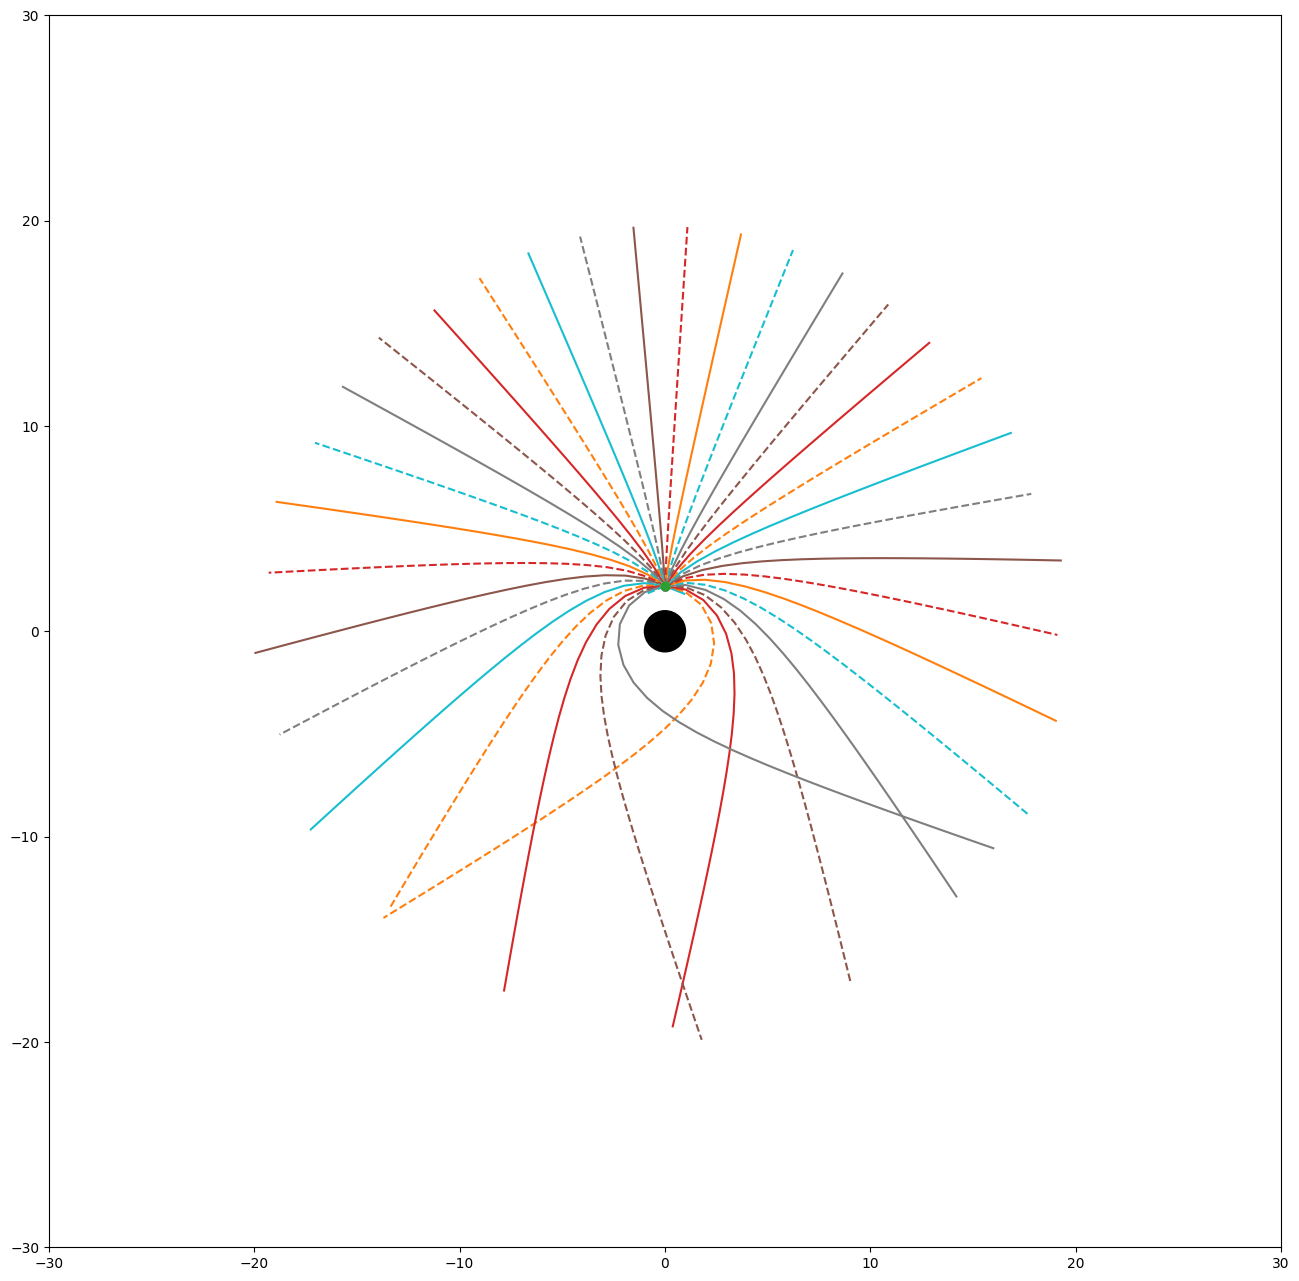

In [19]:
# Plot    
bh_color = "k"
figure, axes = plt.subplots(figsize=(16,16)) #facecolor=bg_color, 
cc = plt.Circle(( 0,0 ), 1.0, color=bh_color ) 
axes.set_aspect( 1 ) 
axes.add_artist( cc ) 
cc = plt.Circle(( 0,0 ), 1.0, color=bh_color ) 

for i in range(len(th_l)):
    #print(i)
    kx, ky = kx_l[i], ky_l[i]
    #print(kx, ky)
    res = GI.calc_trajectory(k_x_0 = kx, x0 = x0, k_y_0 = ky, y0 = y0, k_z_0 = 0., z0 = 0,\
                            R_end = 20,\
                            # curve_start = 0, \
                            # curve_end = 50, \
                            # nr_points_curve = 50, \
                            max_step = 1,\
                            verbose = False)
    
    kx, x, ky, y, kz, z = res.y
    
    plt.plot(x0, y0, "o")
    if i%2 != 0:
        plt.plot(x, y, "--")
    else:
        plt.plot(x, y)
plt.xlim(-30, 30)
plt.ylim(-30, 30)

In [3]:
GI = geodesic_integrator.GeodesicIntegrator(mass = 0.5)
r0 = [6.46983821, -6.42905193,  4.89384004] 
u0 = [-0.87071096,  0.48766688, -0.06498868]
res = GI.calc_trajectory(k_x_0 = u0[0], x0 = r0[0], k_y_0 = u0[1], y0 = r0[1], k_z_0 = u0[2], z0 = r0[2],\
                            R_end = 5,\
                            # curve_start = 0, \
                            # curve_end = 50, \
                            # nr_points_curve = 50, \
                            max_step = 1,\
                            verbose = False)
kx, x, ky, y, kz, z = res.y

In [4]:
res

           message: A termination event occurred.
           success: True
            status: 1
                 t: [ 0.000e+00  1.020e+00 ...  1.122e+01  1.224e+01]
                 y: [[-8.707e-01 -8.693e-01 ... -7.538e-01 -7.286e-01]
                     [ 6.470e+00  5.582e+00 ... -2.948e+00 -3.704e+00]
                     ...
                     [-6.499e-02 -6.946e-02 ... -3.104e-01 -3.471e-01]
                     [ 4.894e+00  4.825e+00 ...  3.292e+00  2.956e+00]]
               sol: None
          t_events: [array([], dtype=float64), array([ 1.289e+01])]
          y_events: [array([], dtype=float64), array([[-7.144e-01, -4.173e+00,  5.994e-01,
                             4.062e-01, -3.666e-01,  2.724e+00]])]
              nfev: 86
              njev: 0
               nlu: 0
     hit_blackhole: False
 start_inside_hole: False

In [5]:
np.linalg.norm(r0)

10.350902642732175

(-15.0, 15.0)

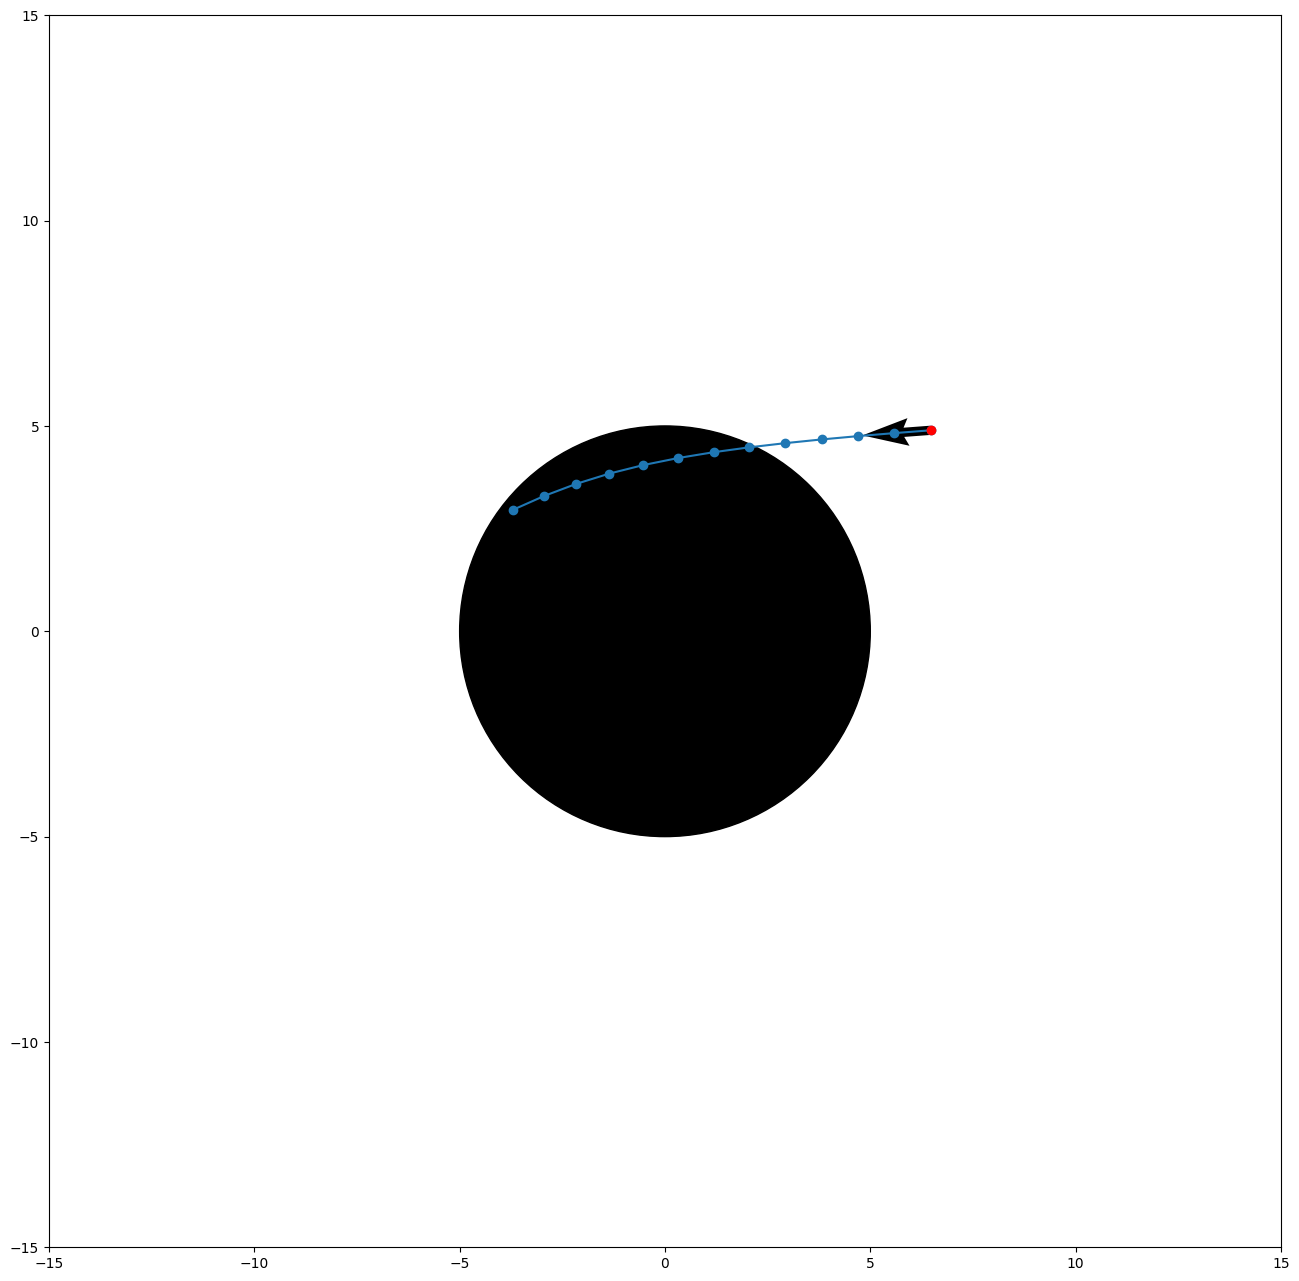

In [6]:
bh_color = "k"
figure, axes = plt.subplots(figsize=(16,16)) #facecolor=bg_color, 
cc = plt.Circle(( 0,0 ), 5.0, color=bh_color ) 
axes.set_aspect( 1 ) 
axes.add_artist( cc ) 
cc = plt.Circle(( 0,0 ), 1.0, color=bh_color ) 

plt.plot(x, z, "o-")
plt.plot(r0[0], r0[2], "ro")
plt.quiver(r0[0], r0[2], u0[0], u0[2])

plt.xlim(-15, 15)
plt.ylim(-15, 15)

In [3]:
GI = geodesic_integrator.GeodesicIntegrator(mass = 0.5)

In [21]:

r0 = [-15, 0,  0] 
print(np.linalg.norm(r0))
u0 = [1,  0,0]
res = GI.calc_trajectory(k_x_0 = u0[0], x0 = r0[0], k_y_0 = u0[1], y0 = r0[1], k_z_0 = u0[2], z0 = r0[2],\
                            R_end = 20,\
                            # curve_start = 0, \
                            # curve_end = 50, \
                            # nr_points_curve = 50, \
                            max_step = np.inf,\
                            verbose = False)
kx, x, ky, y, kz, z = res.y
print(res.message)
print(np.linalg.norm([x[-1], y[-1], z[-1]]))

15.0
A termination event occurred.
19.34557920575453


(-25.0, 25.0)

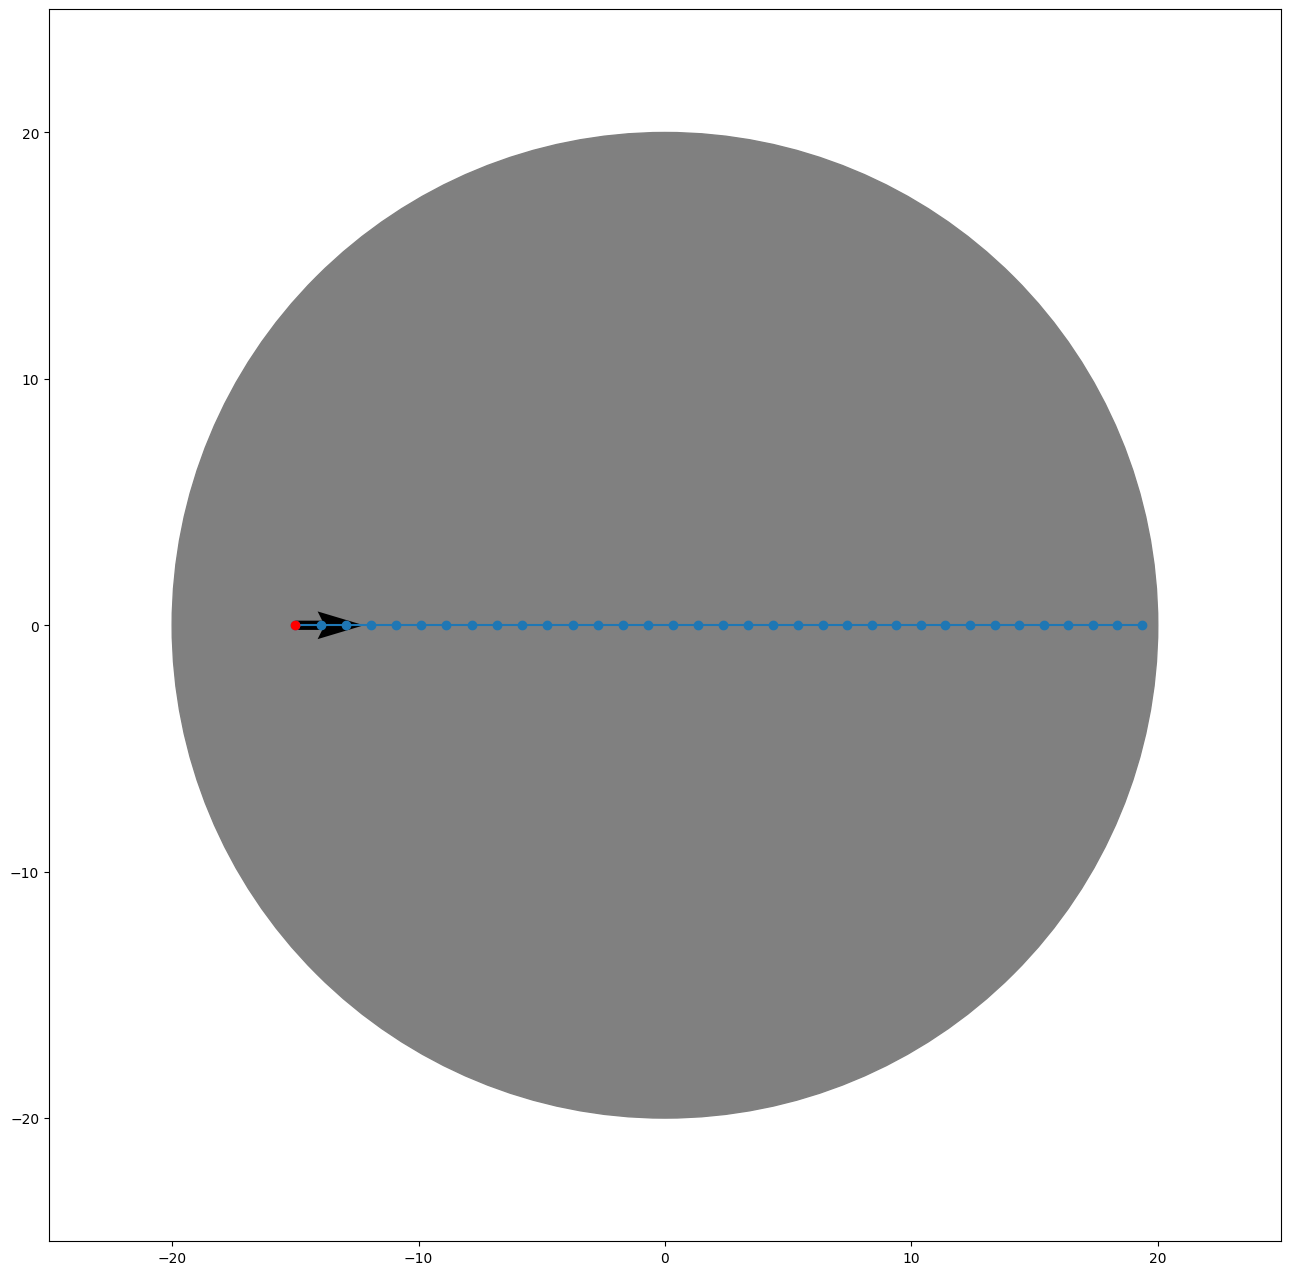

In [22]:
bh_color = "gray"
figure, axes = plt.subplots(figsize=(16,16)) #facecolor=bg_color, 
cc = plt.Circle(( 0,0 ), 20.0, color=bh_color ) 
axes.set_aspect( 1 ) 
axes.add_artist( cc ) 
cc = plt.Circle(( 0,0 ), 1.0, color=bh_color ) 

plt.plot(x, z, "o-")
plt.plot(r0[0], r0[2], "ro")
plt.quiver(r0[0], r0[2], u0[0], u0[2])

plt.xlim(-25, 25)
plt.ylim(-25, 25)